# Assignment 1 - Part B.1: working with real data

In this assignment you will import and explore/analyze a dataset for classification. You will explore which ML algorithms are best to classify this and you will present your best solution. For this assignment we will use Human Activity dataset:

### Description of the dataset:

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/XOEN9W05_4A/0.jpg)](https://www.youtube.com/watch?v=XOEN9W05_4A)

https://youtu.be/XOEN9W05_4A


The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters. From the procecced input sensors a 561-feature vector with time and frequency domain variables is generated.
For more details see: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

> NOTE: we have downloaded this dataset already for you and placed it on the github as HAR.zip

### Steps

In this assignment you will analyze the data, train and evaluate a model based on this dataset. 

These are the generic steps to be taken
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.
9. Additional Questions



----

In the Notebook this structure is used for dividing the different steps, so make sure you do the implementation and analisis at these location in the notebook. 

You may add additinal code blocks, but keep the seperation of the given structure.

At the end of each block summarize / comment / conclude your current step in the given textblocks.

At the end you have to hand in this notebook together with the notebooks of Assignment 1, when you hand it in you should make sure that you saved it with all output visible. So we can evaluate your notebooks output without directly ruinning it.
In addition (to be sure) you should also save a pdf of the final result.

----

### Hints

The needed dataset is available in our github repository (HAR.zip), how to download this from your notebook and addition hints are available in the Tips & Tricks file

```
Imad Hanzaz, Yannick Urselmann, Jaylong Verschuren
```


# 1. Frame the problem and look at the big picture
Describe the problem at hand and explain your approach

We need to classify the data for the activities. 

- WALKING_DOWNSTAIRS
- WALKING_UPSTAIRS
- WALKING
- SITTING
- STANDING
- LAYING

This is mostly depending on the acceleration and gyroscope data. Also other factors as angles are dependent.
Since there is a lot of data, good processing is needed and 3 models get trained in the end.

# 2. Get the data.

Initialize the system, get all needed libraries, retreive the data and import it

> NOTE: You can download the dataset directly from github, see Tips & Tricks

## Import needed libraries for pandas, seaborn, matplotlib, plotly and scikit-learn.

The training and testing dataset are merged together to split later to 80/20% training/test instead of 70/30%

In [196]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


data = pd.concat(map(pd.read_csv, ["./train.csv", "./test.csv"]), ignore_index=True)


Verify the data import was successful.

In [197]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


# 3. Explore the data to gain insights.

Explore the data in any possible way, visualize the results (if you have multiple plots of the same kind of data put them in one larger plot)

> NOTE:You can visualize high-dimensional data in 2-d using T-distributed Stochastic Neighbor Embedding, see Tips & Tricks. (You can also visualze it in 3D, as described in the tutorial)



Describe the data to check for mean values, min, max etc.

In [198]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


Validating the shape of the dataset to match the needed shape for training

In [199]:
data.shape

(10299, 563)

Check if there is missing data, in this case there is none

In [200]:
data.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

Plot a bar chart of the activities which were executed to see if the data is spread well

In [201]:

plt.figure(figsize=(5, 5))
label1 = data['Activity'].value_counts()

graph1 = go.Bar(name="Training set", x=label1.index, y=label1.values)

layout = go.Layout(height=500, width=1100, title = 'Activity (Train & Test Set)',
                   xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
                   yaxis = dict(title = 'Amount', showgrid=False),
                   plot_bgcolor='#ffffff', paper_bgcolor='#ffffff',
                   title_font=dict(size=25, color='#a5a7ab', family='verdana'),
                   margin=dict(t=80, b=30, l=70, r=40),
                   font=dict(color='#8c8f63'))

figure = go.Figure(data=[graph1], layout=layout,)
figure.update_traces(textfont=dict(color='#f0f'),marker=dict(line=dict(color='#ffffff', width=1)))
figure.update_layout(xaxis=dict(autorange="reversed"), 
                    barmode='stack', 
                    xaxis_tickangle=-45)

iplot(figure)

<Figure size 500x500 with 0 Axes>

Check the distribution in percentages for each activity

In [202]:
label_counts_for_train = data['Activity'].value_counts()
colors = px.colors.qualitative.Plotly


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(hole=0.5, labels=label_counts_for_train.index, values=label_counts_for_train.values, name="Train Set"), 1, 1)

fig.update_layout(
    height=450, width=700,
    title = 'Activity Counts Distribution For Train set',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#ffffff', paper_bgcolor='#ffffff',
    title_font=dict(size=25, color='#a5a7ab', family='verdana'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8c8f63'))
# graph = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))
fig.show()

Create a t-sne graph to visualize every feature and there position.

c:\Users\yanni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\yanni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10299 samples in 0.020s...
[t-SNE] Computed neighbors for 10299 samples in 0.934s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.385627
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.984169
[t-SNE] KL

<AxesSubplot: >

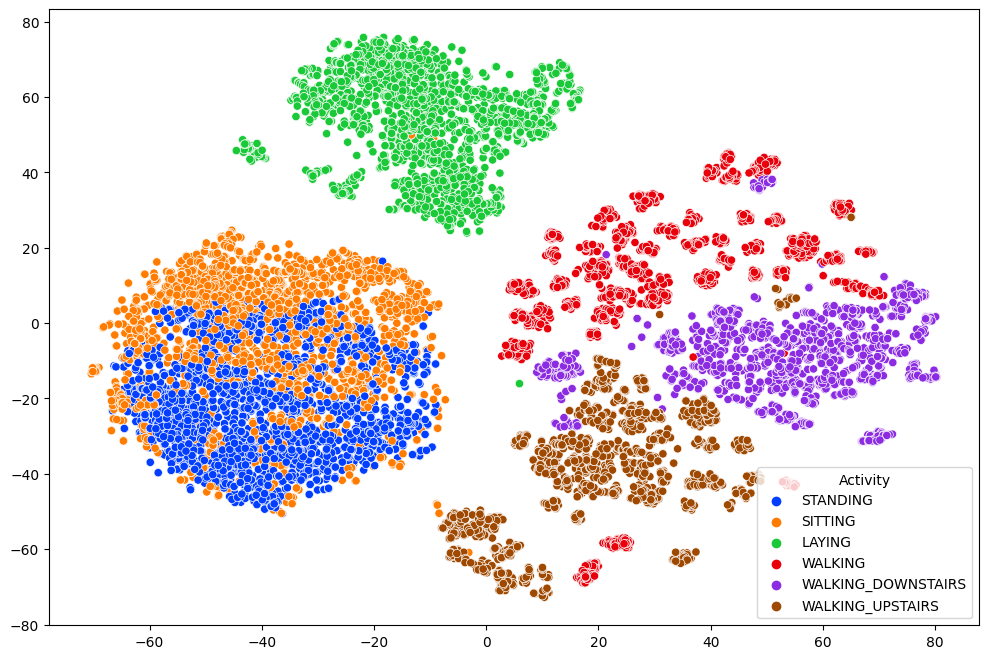

In [203]:
# t-sne (2D)
x_for_tsne = data.drop(['subject', 'Activity'], axis=1)

tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(x_for_tsne)
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = data["Activity"],palette="bright")

# 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms

prepare your data, is it normalized? are there outlier? Make a training and a test set.


Check for outliers in the data

In [204]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['subject'], name="Train Set", notched=True))

fig.update_xaxes(showgrid=False)
fig.update_layout(
    height=450, width=700,
    title = 'Activity count distribution Train',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#ffffff', paper_bgcolor='#ffffff',
    title_font=dict(size=25, color='#a5a7ab', family='verdana'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8c8f63'))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(boxpoints='all', jitter=0)

Divide the data in X and Y (Input and output) by dropping the activity and subject from the input set and assigning the activity values to the output set.

In [205]:
X= data.drop(['Activity','subject'],axis=1)
y= data.Activity.values.astype(object)

X.shape , y.shape

((10299, 561), (10299,))

In [206]:
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [207]:
y

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

Encode the data to integers instead of labels like 'STANDING'.

In [208]:
encoder=preprocessing.LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)
y

array([2, 2, 2, ..., 5, 5, 5])

Scale the input data to an array instead of a data frame

In [209]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [210]:
X

array([[ 2.10533854e-01, -6.87026385e-02, -4.52194533e-01, ...,
        -6.74432366e-01,  3.82007658e-01, -1.61505480e-02],
       [ 6.02084832e-02,  3.59023537e-02, -2.75221885e-01, ...,
        -6.81359801e-01,  3.83147865e-01, -1.20627169e-04],
       [ 7.84597052e-02, -4.64269585e-02, -8.55480582e-02, ...,
        -6.89470939e-01,  3.84288531e-01,  1.92144041e-02],
       ...,
       [ 1.11821625e+00,  1.28805864e+00, -1.29414692e-01, ...,
        -3.10750224e-01,  6.91509049e-01,  8.75719123e-01],
       [-5.43492722e-01,  9.75327452e-01,  2.34319837e-01, ...,
        -3.19283719e-01,  6.59762215e-01,  8.99444350e-01],
       [-1.78515253e+00, -1.86663622e-02, -5.29759691e-01, ...,
        -3.19991245e-01,  6.56994458e-01,  9.01454465e-01]])

Divide the data into training and testing sets by splitting it 80%/20% and validating the shape of the data

In [211]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8239, 561), (2060, 561), (8239,), (2060,))

# 5. Explore many different models and short-list the best ones.

Explore / train and list the top 3 algorithms that score best on this dataset.

### SVC Classification

Here a model is trained with a SVC model. The model is not tweaked at this point but has a very nice accuracy score of 97.82%
Also a confusion matrix is made to visualize the TP, TN, FP, FN. As seen the most are True Positive

In [212]:
svc=SVC()

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

accSVC = accuracy_score(y_test, y_pred)*100


print(f"SVC Model has an accuracy score of {accSVC} %")



SVC Model has an accuracy score of 97.81553398058253 %


In [213]:
svcConf = confusion_matrix(y_test, y_pred)
fig = px.imshow(svcConf, text_auto=True, width= 400)
fig.show()


### Random Forest Classification

Here a model is trained with a Random Forest model. This model is also not tweaked at this point but has a very nice accuracy score of 97.70%
Also a confusion matrix is made to visualize the TP, TN, FP, FN. As seen the most are True Positive

In [214]:
rand_clf=RandomForestClassifier()

rand_clf.fit(X_train,y_train)

y_pred=rand_clf.predict(X_test)

accRandomForest = accuracy_score(y_test,y_pred)*100

# compute and print accuracy score
print(f"Random Forest Classifier has an accuracy score of: {accRandomForest} %")


Random Forest Classifier has an accuracy score of: 97.33009708737865 %


In [215]:
z = confusion_matrix(y_test, y_pred)

fig = px.imshow(z, text_auto=True, width= 400)
fig.show()

### KNN Classification

Here a model is trained with a KNN model. This model is also not tweaked at this point but has a very nice accuracy score of 96.75%
Also a confusion matrix is made to visualize the TP, TN, FP, FN. As seen the most are True Positive too

In [216]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
accKNN = accuracy_score(y_test, y_pred)*100

print(f"KNN Model has an accuracy score of {accKNN}")

KNN Model has an accuracy score of 96.74757281553397


In [217]:
knnConf = confusion_matrix(y_test, y_pred)

fig = px.imshow(knnConf, text_auto=True, width= 400)
fig.show()

# 6. Fine-tune your models and combine them into a great solution.

can you get better performance within a model? e.g if you use a KNN classifier how does it behave if you change K (k=3 vs k=5 vs k=?). Which parameters are here to tune in the chosen models? 

### Fine tuned version of SVC model

Here a 'rbf' kernel is added to the SVC model and C is set to 23 which tells the optimization how much misclassifying is avoided each training example. 

In [218]:
svc=SVC(kernel='rbf', C=23)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
accSVCfinetuned = accuracy_score(y_test,y_pred)*100

# compute and print accuracy score
print(f"SVC Model has an accuracy score of {accSVCfinetuned} %")



SVC Model has an accuracy score of 98.98058252427184 %


In [219]:
svcConf = confusion_matrix(y_test, y_pred)
fig = px.imshow(svcConf, text_auto=True, width= 400)
fig.show()


### Fine tuned version of the Random Forest model

The Random Forest Classifier gets a random state of 5 in this optimization. This improves the accuracy slightly.

In [220]:
rand_clf=RandomForestClassifier(random_state=5)

rand_clf.fit(X_train,y_train)

y_pred=rand_clf.predict(X_test)

accRandomForestfinetuned = accuracy_score(y_test,y_pred)*100

# compute and print accuracy score
print(f"Finetuned Random Forest Classifier has an accuracy of: {accRandomForestfinetuned} %")


Finetuned Random Forest Classifier has an accuracy of: 97.57281553398059 %


In [221]:
z = confusion_matrix(y_test, y_pred)

fig = px.imshow(z, text_auto=True, width= 400)
fig.show()

### Fine tuned version of the KNN Classifier

Here the KNN is optimized by setting the weights parameter to 'distance' in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
The algorithm is set to 'kd_tree' and the number of neighbors is set to 3.

In [222]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights='distance', n_neighbors=3, algorithm='kd_tree')
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)

accKNNfinetuned = accuracy_score(y_test, y_pred)*100

print(f"Finetuned KNN Model accuracy score is {accKNNfinetuned} %")

Finetuned KNN Model accuracy score is 96.89320388349515 %


In [223]:
knnConf = confusion_matrix(y_test, y_pred)

fig = px.imshow(knnConf, text_auto=True, width= 400)
fig.show()

# 7. Present your solution.

Explain why you would choose for a specific model



All the results are put into a bar graph in which visually can be seen which model is the best.

In [224]:
import plotly.express as px

d = {'classifier': ["SVC","Random Forest","KNN","SVC","Random Forest","KNN"], 
     'percentage': [accSVC, accRandomForest, accKNN, accSVCfinetuned, accRandomForestfinetuned, accKNNfinetuned], 
     'finetuned': ["no", "no", "no", "yes", "yes", "yes"]}

df = pd.DataFrame(data=d)
df




,classifier,percentage,finetuned
0,SVC,97.815534,no
1,Random Forest,97.330097,no
2,KNN,96.747573,no
3,SVC,98.980583,yes
4,Random Forest,97.572816,yes
5,KNN,96.893204,yes


In [225]:
fig = px.histogram(df, x="classifier", y="percentage",
             color='finetuned', barmode='group',
             height=400, text_auto=True)
fig.update_layout(yaxis_range=[90,100], 
                  yaxis=dict(title='Accuracy',showgrid=False),
                  xaxis=dict(title='Classifier',showgrid=False),
                  title="Accuracy scores of different classifiers (Non-Finetuned vs. Finetuned)"
                  )
fig.show()


The fine tuned SVC model is the best fit as model with an accuracy of 98.98%. Also finetuning did the most with this model. The random forest model and KNN are not as easily optimizable as the SVC model.
Therefore, we choose the fine tuned SVC model as model.


# 8. Launch, monitor, and maintain your system.

Deployment we will do in the next assignment!

# 9. Additional Questions

* **Explain which classes should be easy / challenging to classify based on your  2/3D plots the data?** <br>
  Based on the TSNE graph (2D), there can be concluded that the Laying activity is the most easy to classify since there are no other activities in the neighbourhood.
  Standing and laying are more difficult to classify since they are very close to each other.

* **Explain what specifics you did to this dataset for preparing your data?** <br> 
  We merged the training and testing set together because we wanted to train the models with a 80/20 split instead of 70/30 because 
  of good experiences out of previous experiments. Furthermore, not much changes have been done to the dataset since it is already a good dataset.

* **Explain why you think that your chosen algorithm outperforms the rest?** <br>
  The chosen algorithm outperforms the rest since it is quick to run and it's accuracy is a lot higher than the rest.